In [1]:
import os
import shutil
import zipfile
import tarfile
from torchvision import datasets
import matplotlib.pyplot as plt

## Data loading

### Download pix2pix and cyclegan datasets

In [2]:
def unzip_file(zip_path, extract_to):
    print(f"Unzipping {zip_path} ...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(" --> done!")


def untar_file(tar_path, extract_to):
    print(f"Extracting {tar_path} ...")
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_to)
    print(" --> done!")

In [3]:
def download_cyclegan_pix2pix_dataset(dataset_type: str, dataset_name: str, download_folder = "data"):
    """
    Download on of the dataset from Cyclegan or pix2pix.

    dataset_type: one of "pix2pix", "cyclegan"
    dataset_name: 
        Cyclegan:
            # Unpaired
            "apple2orange",
            "summer2winter_yosemite",
            "horse2zebra",
            "monet2photo",
            "cezanne2photo",
            "ukiyoe2photo",
            "vangogh2photo",
        Pix2Pix:
            "facades"
            "cityscapes"
            "maps"
            "edges2shoes"
            "edges2handbags"
            "night2day"
    download_folder: folder to store the dataset
    """
    dataset_folder = download_folder

    os.makedirs(dataset_folder, exist_ok=True)

    print(f"Dataset '{dataset_name}'")
    if dataset_type == "pix2pix":
        url = f"http://efrosgans.eecs.berkeley.edu/{dataset_type}/datasets/{dataset_name}.tar.gz"
        download_path = os.path.join(dataset_folder, f"{dataset_name}.tar.gz")
    elif dataset_type == "cyclegan":
        url = f"http://efrosgans.eecs.berkeley.edu/{dataset_type}/datasets/{dataset_name}.zip"
        download_path = os.path.join(dataset_folder, f"{dataset_name}.zip")
    else:
        raise Exception("wrong dataset type")
    target_folder = os.path.join(dataset_folder, dataset_name)
    
    
    print("Loading zip file...", end="")
    if not os.path.isfile(download_path) or os.path.exists(target_folder):
        !wget {url} -O {download_path}
    print(" --> done!")

    if os.path.exists(target_folder):
        print(f"Removing existing folder {target_folder}")
        shutil.rmtree(target_folder)

    if dataset_type == "pix2pix":
        untar_file(download_path, dataset_folder)
    elif dataset_type == "cyclegan":
        unzip_file(download_path, dataset_folder)

    if os.path.isfile(download_path):
        os.remove(download_path)

    splits = os.listdir(target_folder)
    print(f"Provided splits: {splits}")

In [4]:
download_cyclegan_pix2pix_dataset("pix2pix", "night2day", download_folder="data")

Dataset 'night2day'
Loading zip file.../bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2025-04-26 13:04:59--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/night2day.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2063695642 (1.9G) [application/x-gzip]
Saving to: ‘data/night2day.tar.gz’

data/night2day.tar. 100%[===================>]   1.92G  2.06MB/s    in 10m 51s 

2025-04-26 13:15:51 (3.02 MB/s) - ‘data/night2day.tar.gz’ saved [2063695642/2063695642]

 --> done!
Extracting data/night2day.tar.gz ...


/tmp/ipykernel_210021/3963155323.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_to)


 --> done!
Provided splits: ['val', 'test', 'train']


In [5]:
download_cyclegan_pix2pix_dataset("pix2pix", "cityscapes", download_folder="data")

Dataset 'cityscapes'
Loading zip file.../bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2025-04-26 13:16:04--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/cityscapes.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103441232 (99M) [application/x-gzip]
Saving to: ‘data/cityscapes.tar.gz’

data/cityscapes.tar 100%[===================>]  98.65M  1011KB/s    in 57s     

2025-04-26 13:17:02 (1.73 MB/s) - ‘data/cityscapes.tar.gz’ saved [103441232/103441232]

 --> done!
Extracting data/cityscapes.tar.gz ...


/tmp/ipykernel_210021/3963155323.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_to)


 --> done!
Provided splits: ['val', 'train']


In [6]:
download_cyclegan_pix2pix_dataset("pix2pix", "maps", download_folder="data")

Dataset 'maps'
Loading zip file.../bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2025-04-26 13:17:04--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250242400 (239M) [application/x-gzip]
Saving to: ‘data/maps.tar.gz’

data/maps.tar.gz    100%[===================>] 238.65M  4.12MB/s    in 87s     

2025-04-26 13:18:31 (2.74 MB/s) - ‘data/maps.tar.gz’ saved [250242400/250242400]

 --> done!
Extracting data/maps.tar.gz ...


/tmp/ipykernel_210021/3963155323.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_to)


 --> done!
Provided splits: ['val', 'train']


### Draw samples

In [7]:
def draw_dataset(dataset_folder = "data", dataset_name = "night2day", rm_after=False):
    """
    Draw samples from the dataset
    """
    num_images_per_split = 5

    target_folder = os.path.join(dataset_folder, dataset_name)

    dataset = datasets.ImageFolder(target_folder)

    inds_to_show = {i: [] for i in range(len(dataset.classes))}
    classes_full = 0
    for dataset_ind in range(len(dataset)):
        _, split_ind = dataset[dataset_ind]
        if len(inds_to_show[split_ind]) == num_images_per_split:
            continue
        inds_to_show[split_ind].append(dataset_ind)
        if len(inds_to_show[split_ind]) == num_images_per_split:
            classes_full += 1
        if classes_full == len(dataset.classes):
            break

    for split_name in sorted(dataset.classes):
        split_ind = dataset.class_to_idx[split_name]
        split_folder = os.path.join(target_folder, split_name)
        print(f"Split '{split_name}' of dataset '{dataset_name}' --> size: {len(os.listdir(split_folder))}")

        plt.subplots(1, num_images_per_split, figsize=(5 * num_images_per_split, 5))
        plt.suptitle(f"{dataset_name} ~ {split_name}", y=0.95)
        for i, dataset_ind in enumerate(inds_to_show[split_ind]):
            plt.subplot(1, num_images_per_split, i + 1)
            plt.imshow(dataset[dataset_ind][0])
            plt.xticks([])
            plt.yticks([])
        plt.show()

    if rm_after:
        shutil.rmtree(target_folder)

    print("\n----------------------------\n")


Split 'test' of dataset 'night2day' --> size: 2287


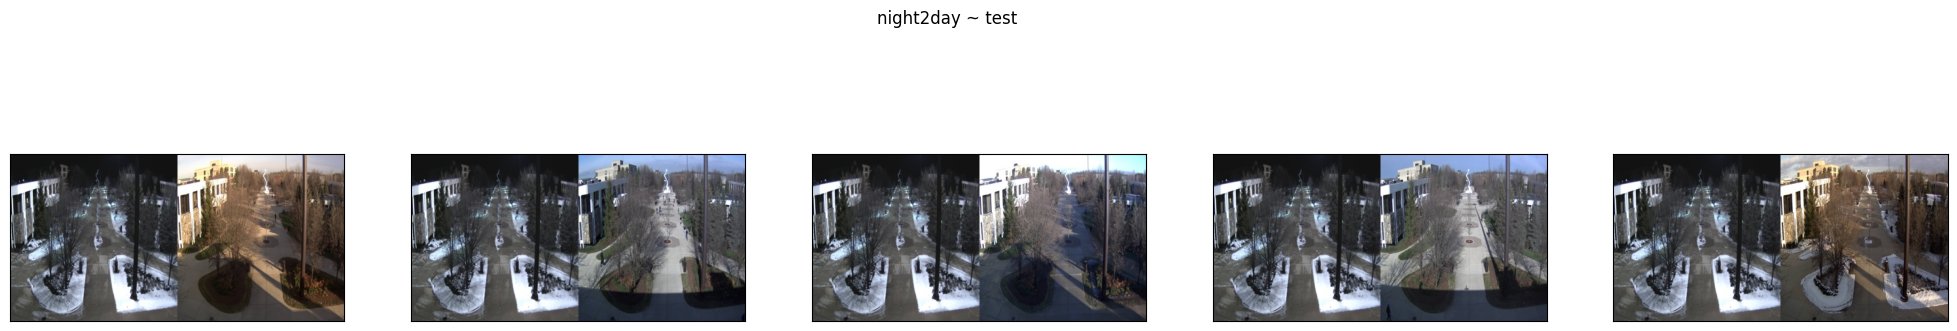

Split 'train' of dataset 'night2day' --> size: 17823


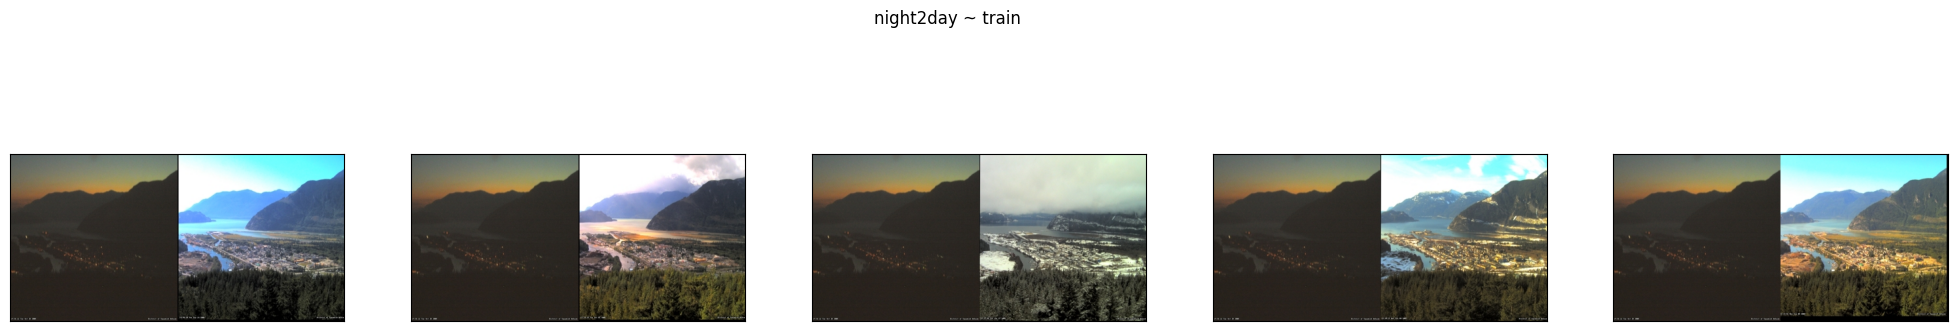

Split 'val' of dataset 'night2day' --> size: 10


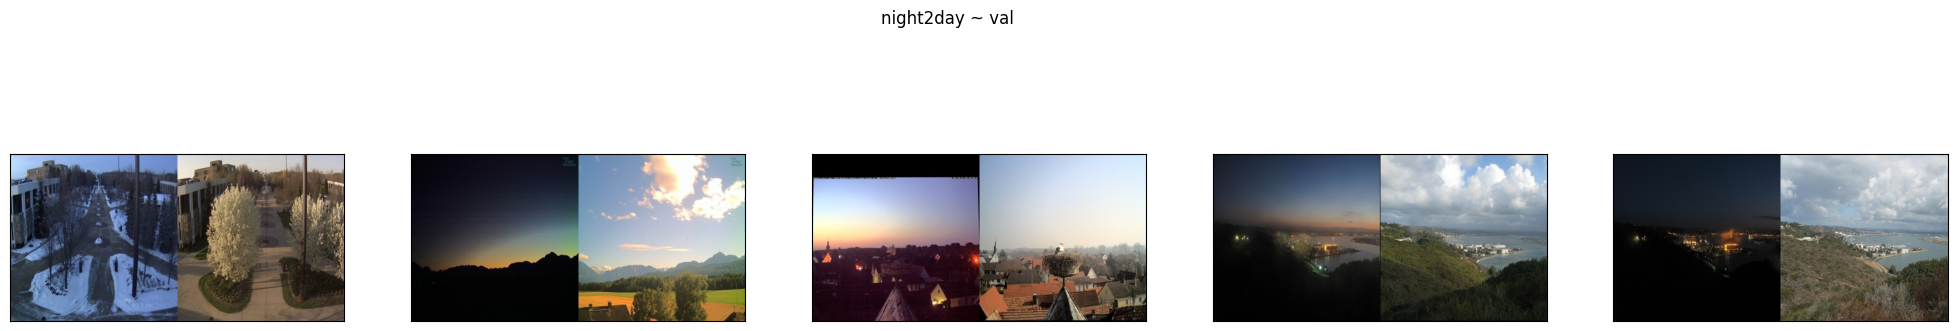


----------------------------



In [8]:
draw_dataset("data", "night2day")

Split 'train' of dataset 'cityscapes' --> size: 2975


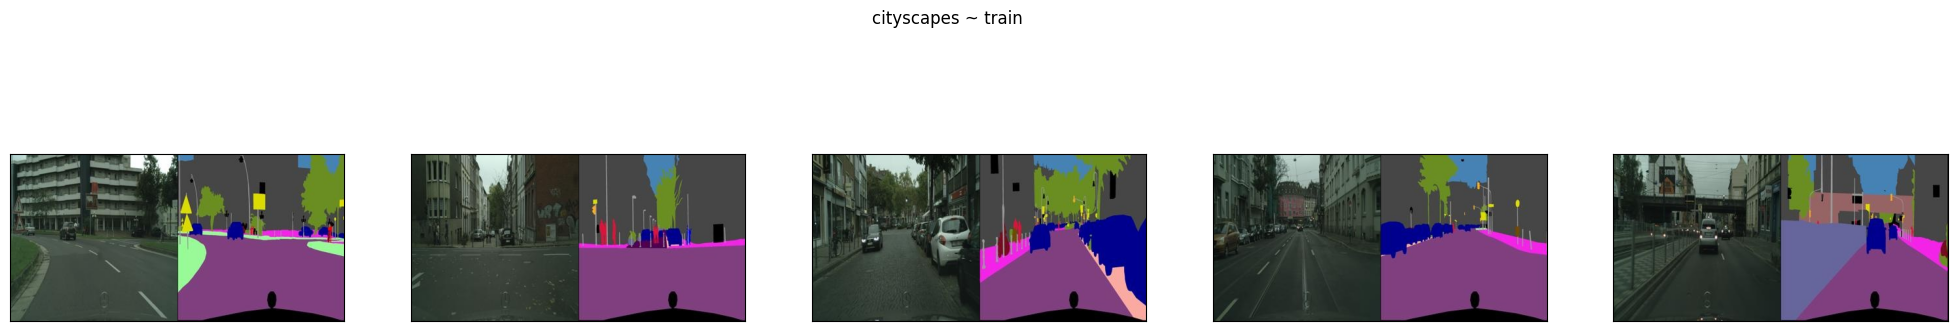

Split 'val' of dataset 'cityscapes' --> size: 500


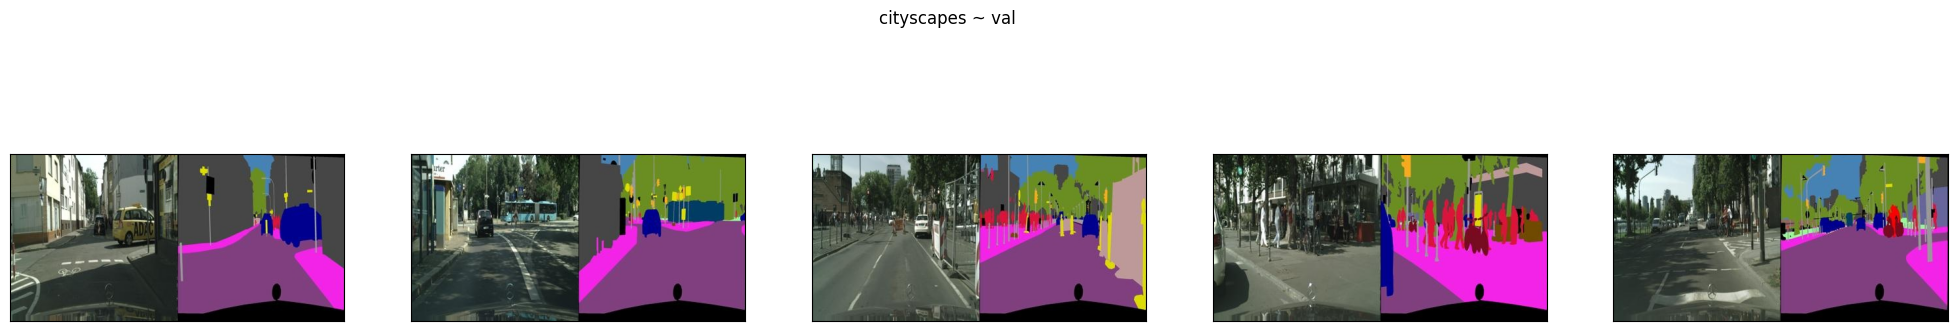


----------------------------



In [9]:
draw_dataset("data", "cityscapes")

Split 'train' of dataset 'maps' --> size: 1096


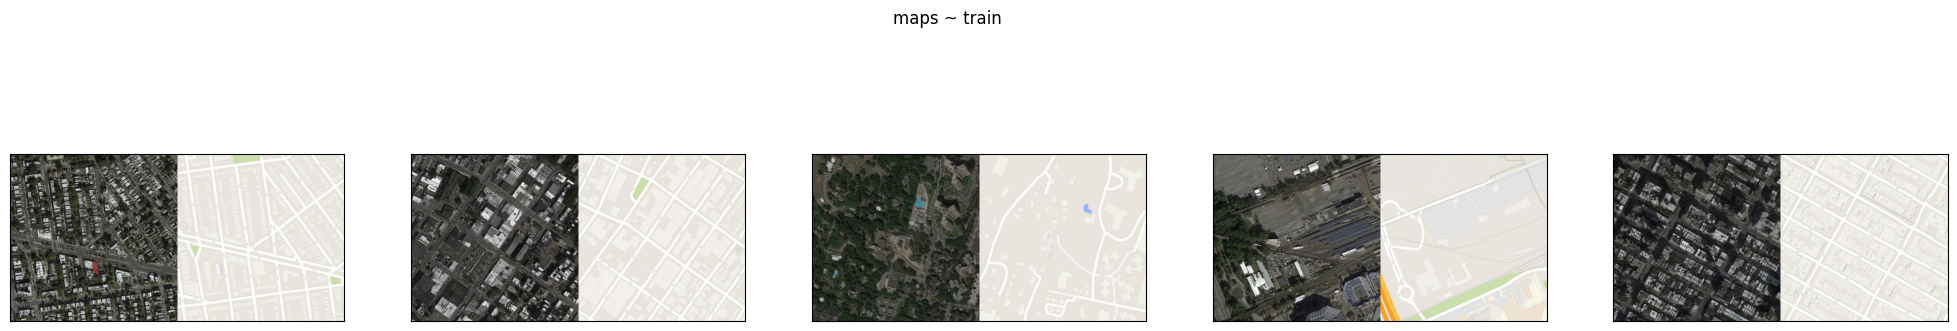

Split 'val' of dataset 'maps' --> size: 1098


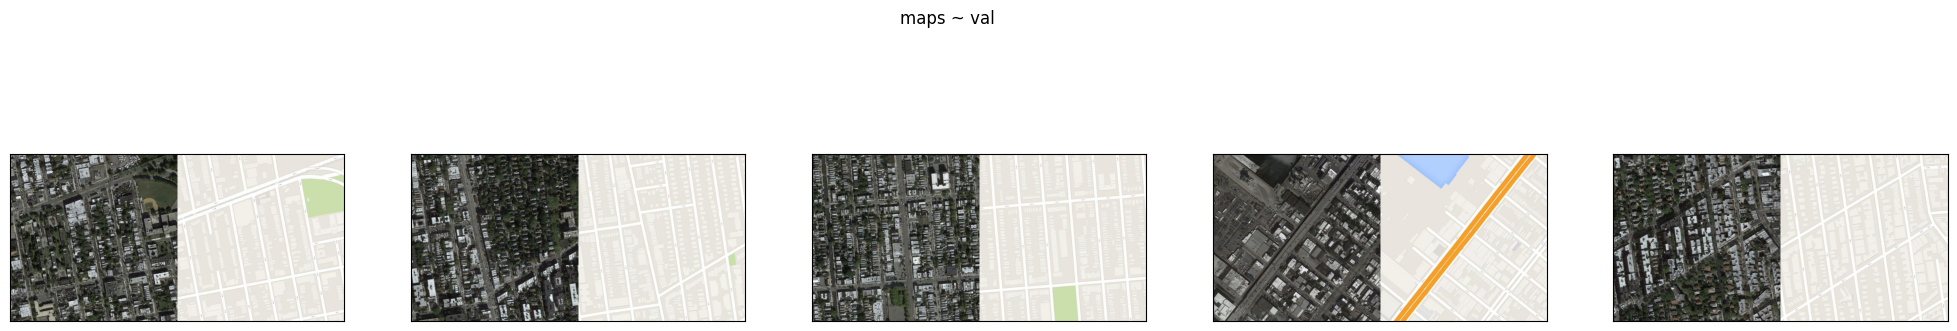


----------------------------



In [10]:
draw_dataset("data", "maps")